In [1]:
import numpy as np
import sklearn
import shap
import time
import torch
import pandas as pd
from Data import CSVData
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

In [3]:
features = ['mode',
'Msim',
'Gsim',
'weight',
'pz_in1',
'pid_in1', 
'pz_in2',
'pid_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'pid_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'pid_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'pid_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'pid_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
features_to_rescale = ['Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget']

In [4]:
model_path = '/raid/projects/asinha15/VLQ-NN-Reweighting/trained_models/model_scripted6.pt'
model = torch.jit.load(model_path).to(device)
model.eval()

RecursiveScriptModule(
  original_name=Sequential
  (Linear0): RecursiveScriptModule(original_name=Linear)
  (Activation0): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear1): RecursiveScriptModule(original_name=Linear)
  (Activation1): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear2): RecursiveScriptModule(original_name=Linear)
  (Activation2): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear_last): RecursiveScriptModule(original_name=Linear)
  (Activation_last): RecursiveScriptModule(original_name=LeakyReLU)
)

In [5]:
def f(X):
    inputs = torch.Tensor(X).to(device)
    with torch.no_grad():
        outputs = model(inputs).to('cpu').numpy().flatten()
    return outputs

In [6]:
test_data = CSVData(batch_size=1024, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['/raid/projects/asinha15/test_' + str(i)+'.csv' for i in range(0,10)])

In [7]:
X, Y = test_data.load_data_many()
X = pd.DataFrame(np.array(X))
Y = Y.flatten()
X.columns = features

In [8]:
shap.initjs()

explainer = shap.SamplingExplainer(f, X.sample(n=100))
shap_values = explainer.shap_values(X.iloc[299,:])
shap.force_plot(explainer.expected_value, shap_values, X.iloc[299,:])

In [9]:
import warnings

warnings.filterwarnings('ignore')

In [10]:
X_subset=X.sample(n=2000) #finding the shap values for 2000 events
shap_values2000 = explainer.shap_values(X_subset, np_samples=50)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [11]:
warnings.filterwarnings('default')

In [ ]:
#shap.force_plot(explainer.expected_value, shap_values2000, X_subset)

In [22]:
X_subset = X_subset.reset_index()

In [24]:
del X_subset['index']

In [25]:
X_subset

,mode,Msim,Gsim,weight,pz_in1,pid_in1,pz_in2,pid_in2,px_out1,py_out1,...,pz_out3,e_out3,pid_out3,px_out4,py_out4,pz_out4,e_out4,pid_out4,Mtarget,Gtarget
0,1.0,1900.0,475.0,0.006979,2712.351141,-2.0,-754.245096,21.0,-0.407111,-24.843838,...,-36.511191,813.066175,-6.0,5.279404,-6.178607,-151.428070,151.718811,5.0,1900.0,475.0
1,-1.0,1900.0,950.0,0.023508,1217.985562,2.0,-2139.749060,21.0,-18.670579,73.330212,...,-1016.145401,1124.488174,5.0,7.175826,-6.243388,-1009.650738,1009.706480,-5.0,1900.0,570.0
2,1.0,1900.0,950.0,0.011627,1671.659785,21.0,-3643.071115,2.0,-37.739405,-103.382756,...,1034.107440,1361.599922,6.0,-128.932036,-55.496213,-29.983505,143.611978,-5.0,1700.0,850.0
3,1.0,1900.0,950.0,0.011627,582.130555,2.0,-2662.365605,21.0,-23.938365,-12.957050,...,-207.369750,770.352813,6.0,-87.390392,-80.598508,-1464.237570,1469.063290,-5.0,1800.0,90.0
4,0.0,1900.0,950.0,0.039529,601.256225,21.0,-2365.628681,2.0,147.649172,-77.426849,...,36.831150,773.731467,6.0,-202.198961,-132.131400,-104.352307,263.162727,-5.0,1800.0,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,1900.0,475.0,0.016103,621.729825,4.0,-1562.608929,21.0,6.966692,-75.237598,...,-475.182085,681.448243,6.0,-2.191381,19.383131,-591.876646,592.216651,-5.0,2100.0,210.0
1996,-1.0,1900.0,475.0,0.014012,2024.485951,-3.0,-1521.974508,21.0,-59.105134,-23.871642,...,-22.651863,1060.548579,5.0,61.466024,-13.001900,-680.112444,683.024266,-5.0,1900.0,380.0
1997,1.0,1900.0,475.0,0.006979,733.503789,21.0,-2645.577421,2.0,-21.628595,-65.112003,...,-595.554961,1054.785838,6.0,10.320669,3.589376,154.392139,154.849677,-5.0,1900.0,95.0
1998,0.0,1900.0,475.0,0.016103,1211.063511,21.0,-1211.760030,2.0,34.849429,-97.708858,...,215.845709,788.191420,6.0,-41.686756,170.041715,-20.749791,176.365003,-5.0,2000.0,700.0


In [15]:
X_subset.shape

(2000, 30)

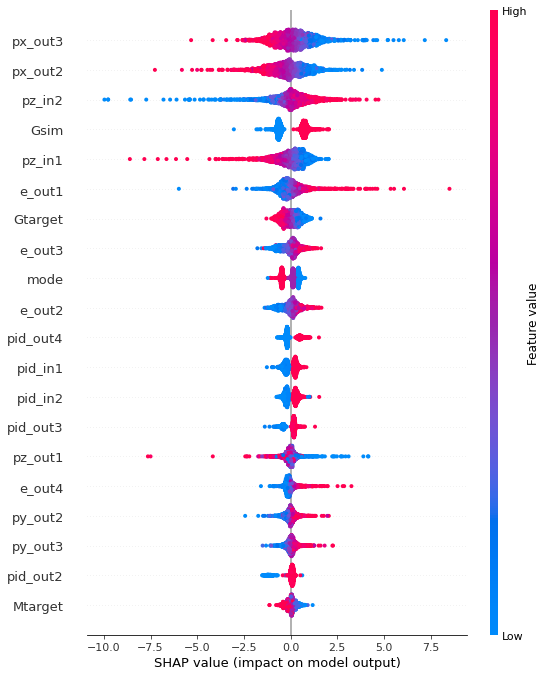

In [16]:
shap.summary_plot(shap_values2000, X_subset)

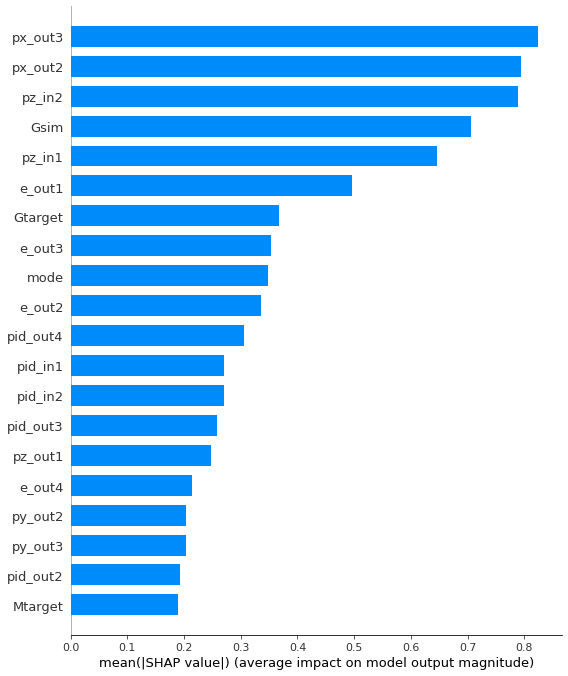

In [17]:
shap.summary_plot(shap_values2000, X_subset, plot_type='bar')

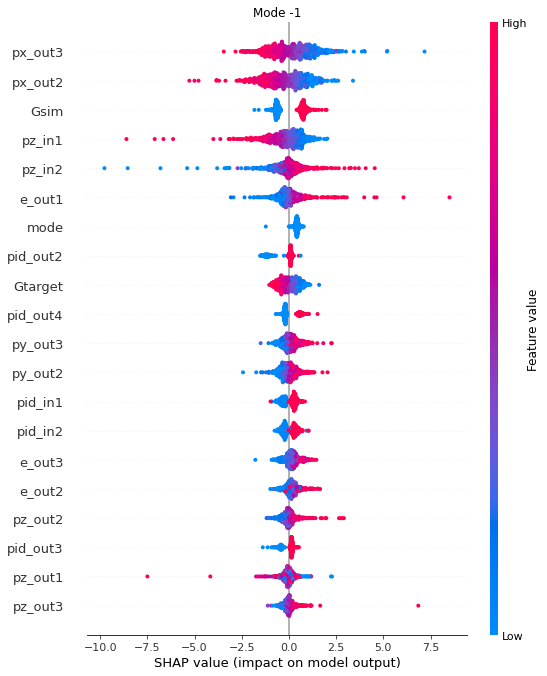

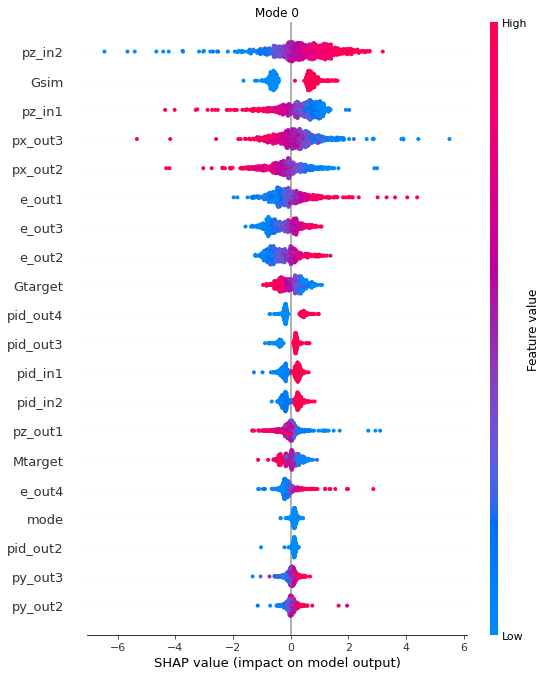

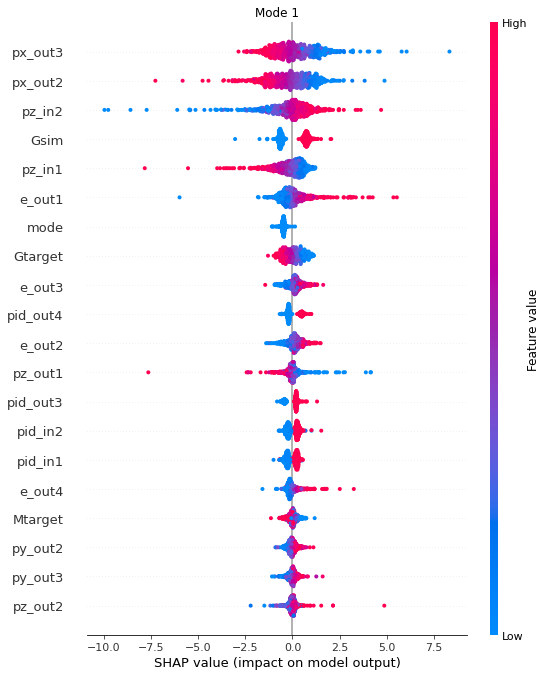

In [26]:
modes = [-1,0,1]
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

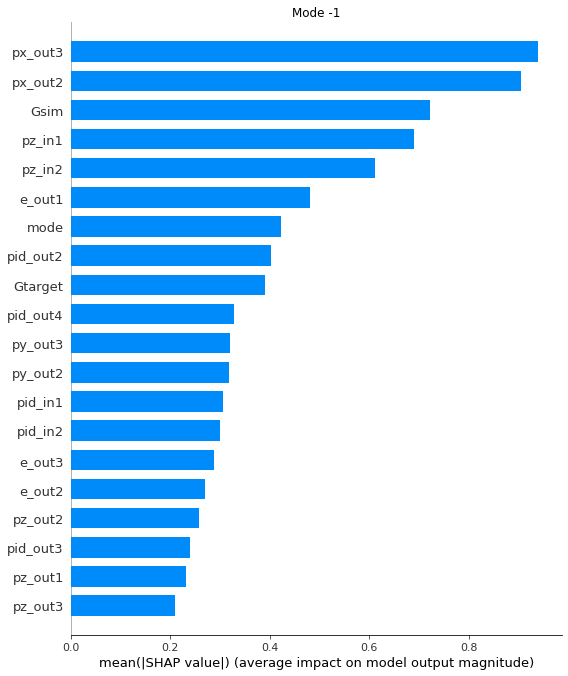

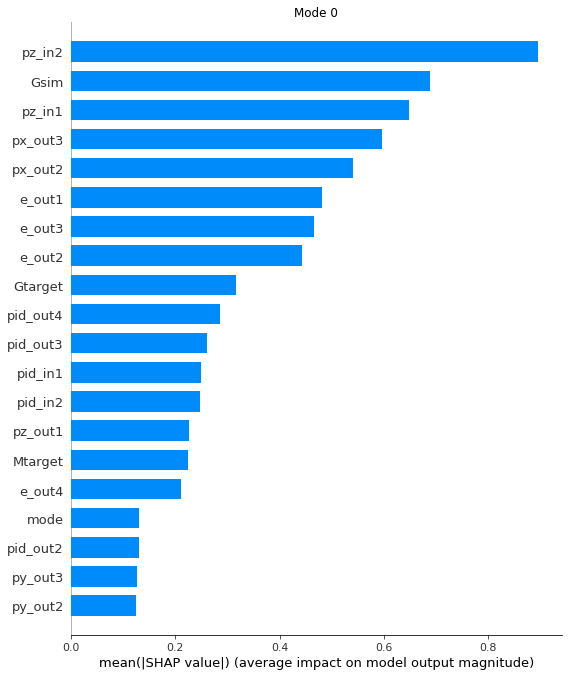

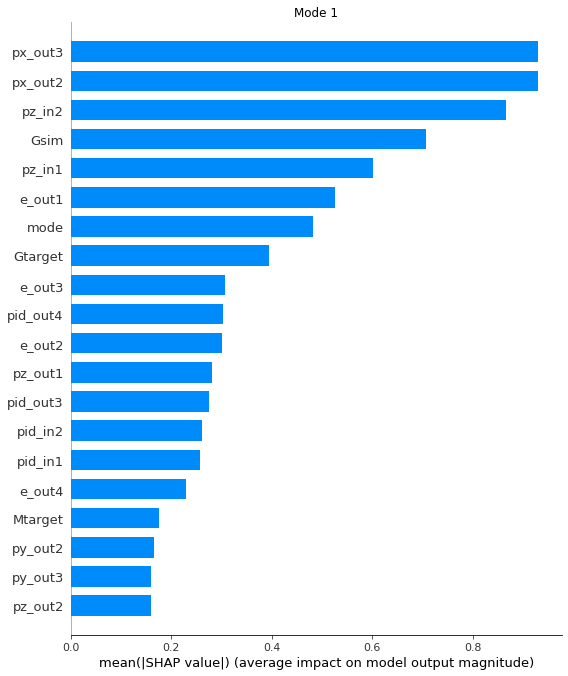

In [27]:
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

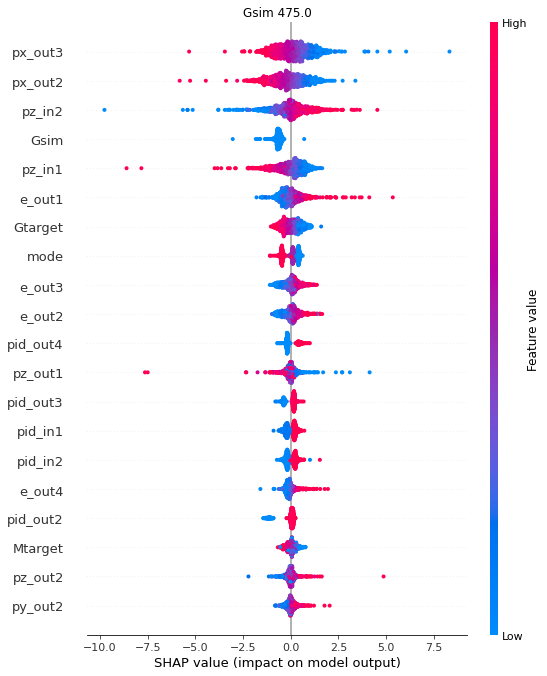

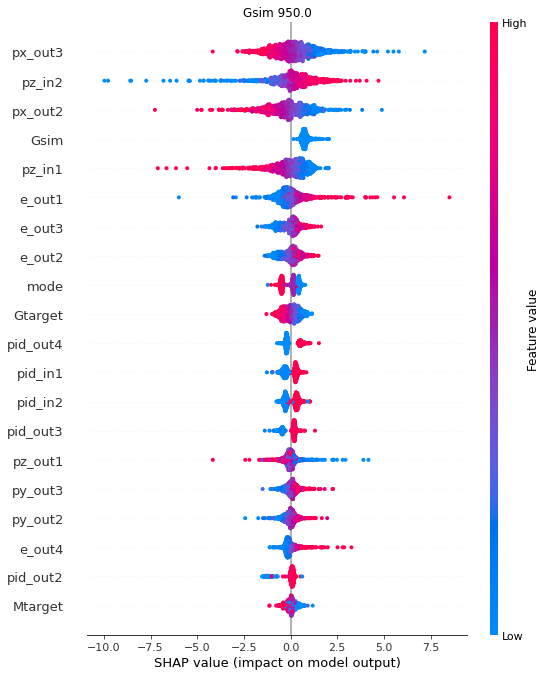

In [28]:
Gsims = X_subset.Gsim.unique()
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

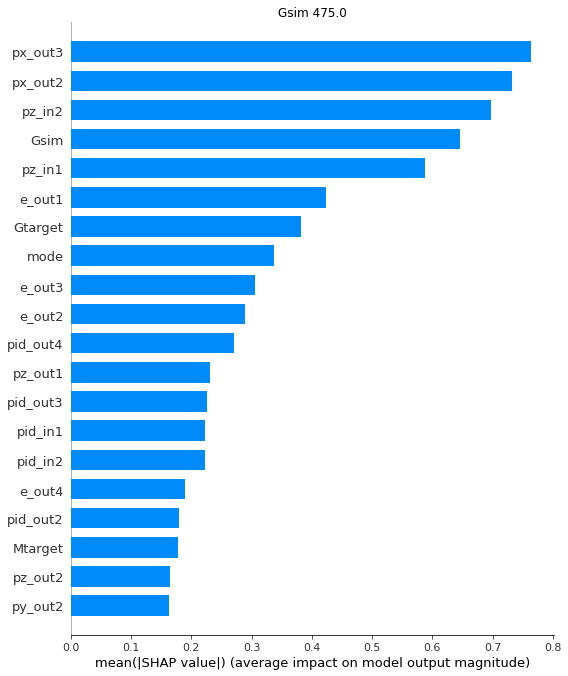

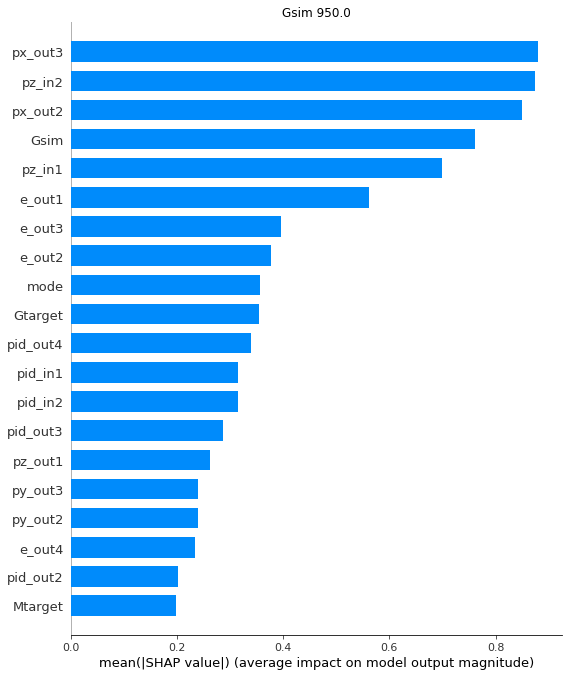

In [29]:
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

In [ ]:
shap.dependance_plot('px_out3', shap_values2000, X_subset)